## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

## Dataset

### Análise Inicial

In [2]:
chuva = pd.read_csv('rain_data_aus.csv')

In [3]:
chuva.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [4]:
chuva.shape

(142193, 23)

In [5]:
chuva.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,141871.000000,138583.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,28.505419,61.991179,10.014164,10.000748,0.227804
std,6.403283,7.117618,8.465173,4.188537,3.781525,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,10.237506,26.649111,3.169832,4.997908,0.272764
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,-3.760000,2.000000,0.000000,-17.739346,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,22.520000,44.000000,8.000000,6.650238,0.030055
50%,12.000000,22.600000,0.000000,4.800000,8.500000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,28.520000,63.200000,10.000000,10.000009,0.100853
75%,16.800000,28.200000,0.800000,7.400000,10.600000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,35.480000,80.000000,12.000000,13.389306,0.329507
max,33.900000,48.100000,371.000000,145.000000,14.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,59.720000,122.000000,26.000000,32.478590,0.999400


In [6]:
chuva.describe(include = 'object')

,date,location,raintoday,raintomorrow
count,142193,142193,140787,142193
unique,3436,49,2,2
top,2013-12-01,Canberra,No,No
freq,49,3418,109332,110316


In [7]:
chuva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

### Avaliando nulos

<Axes: >

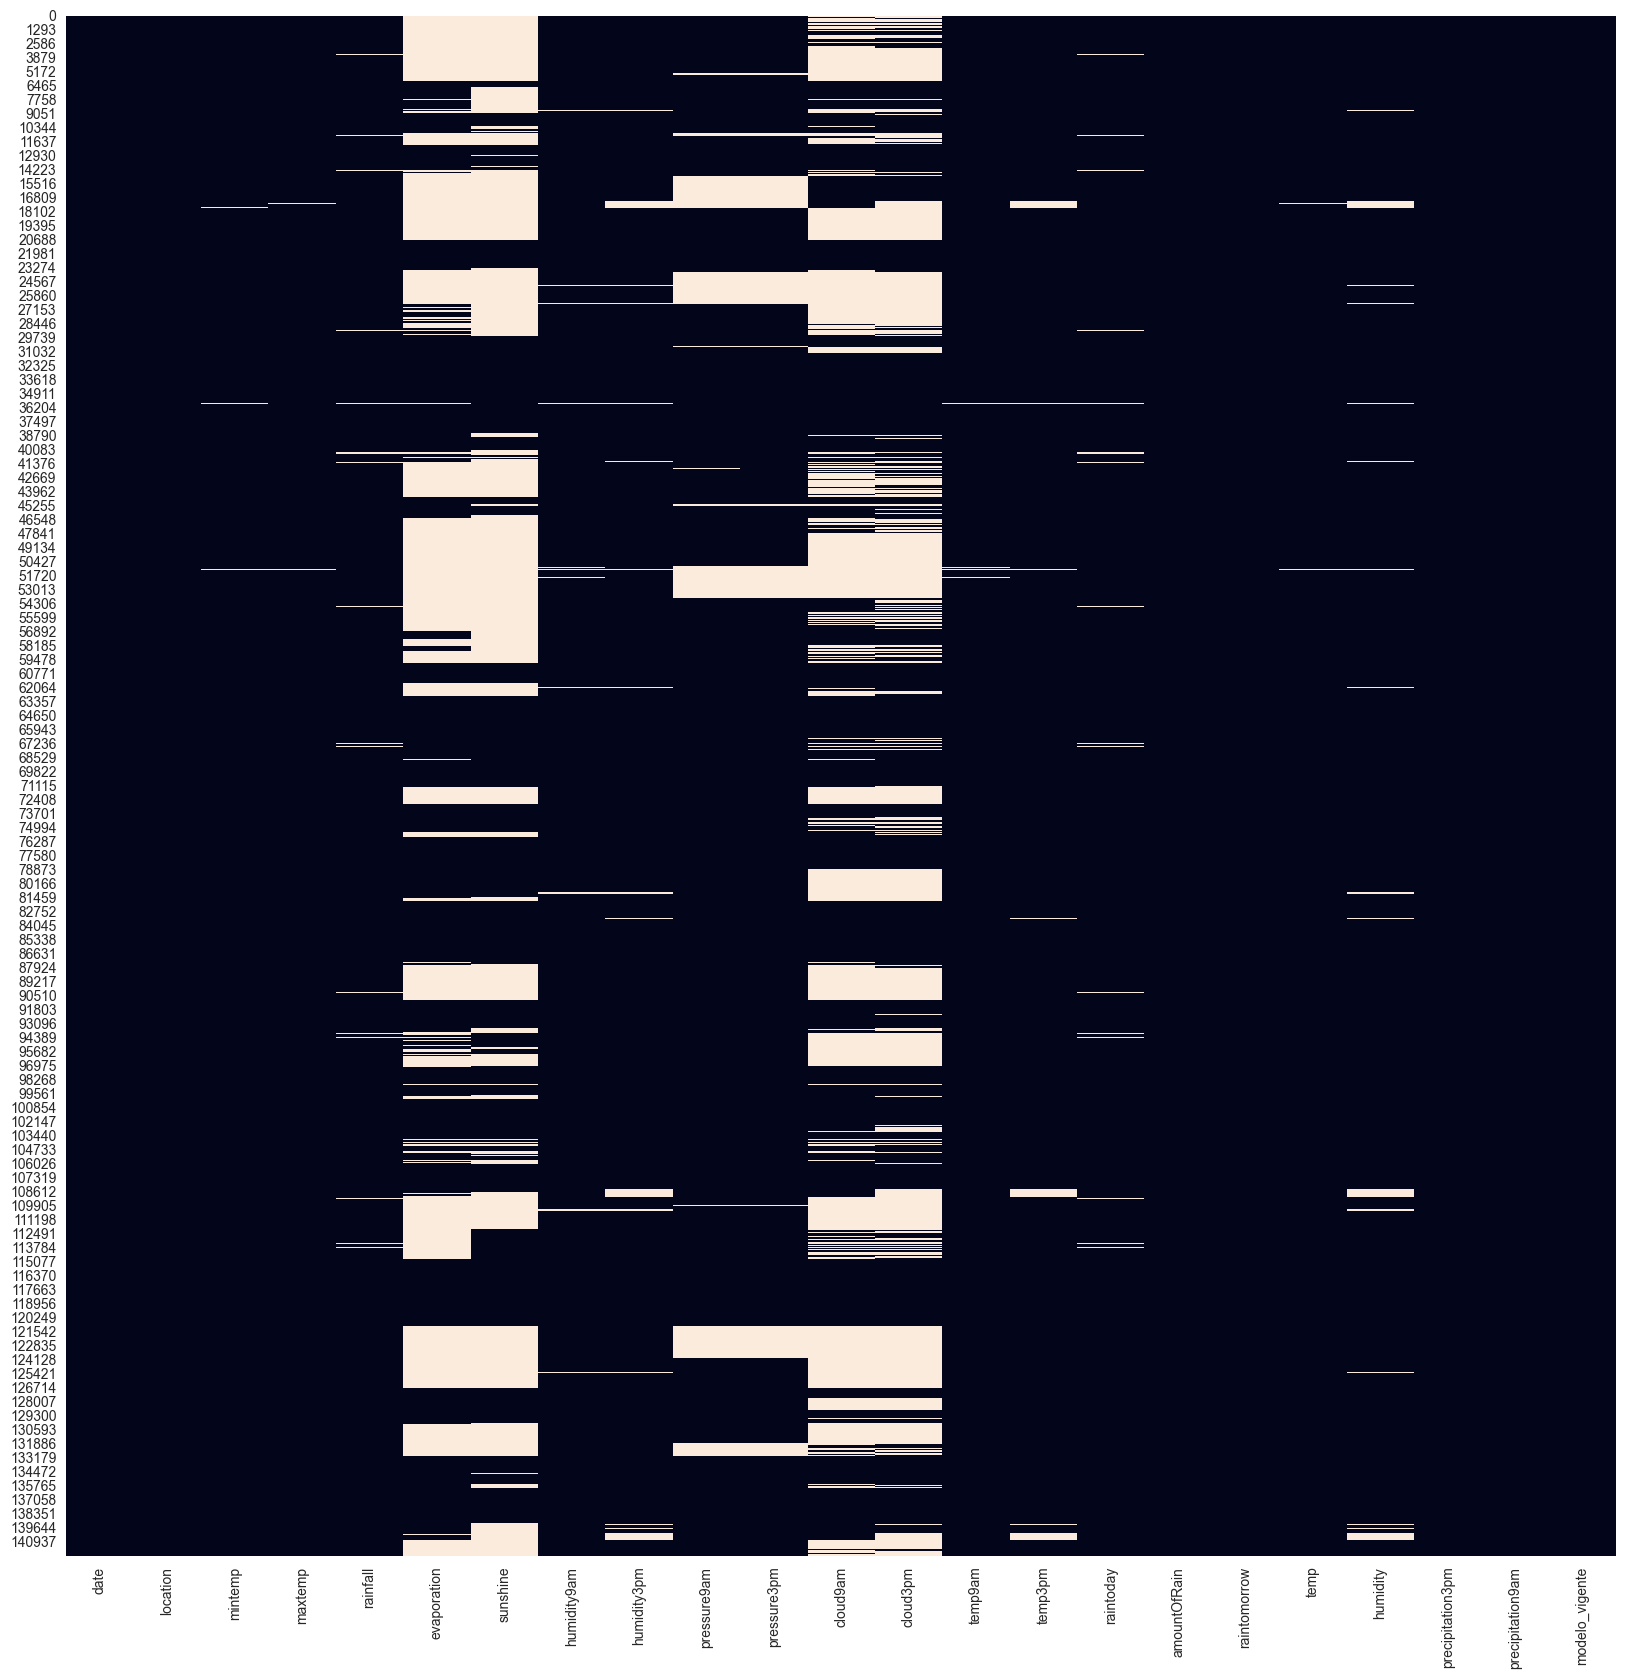

In [8]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(chuva.isnull(),cbar=False)

### Tratando váriaveis booleanas

In [9]:
chuva = pd.get_dummies(chuva, drop_first = True, columns = ['raintoday', 'raintomorrow'])

In [10]:
chuva.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'raintoday_Yes', 'raintomorrow_Yes'],
      dtype='object')

### Avaliando as correlações

In [12]:
chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_41801/294739921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)


raintomorrow_Yes    1.000000
modelo_vigente      0.825086
amountOfRain        0.501485
humidity3pm         0.446160
humidity            0.405600
cloud3pm            0.381870
cloud9am            0.317380
raintoday_Yes       0.306555
humidity9am         0.257161
rainfall            0.239032
mintemp             0.083936
precipitation3pm    0.004503
precipitation9am   -0.007018
temp9am            -0.025691
evaporation        -0.119285
temp               -0.125976
maxtemp            -0.159237
temp3pm            -0.192424
pressure3pm        -0.226031
pressure9am        -0.246371
sunshine           -0.450768
Name: raintomorrow_Yes, dtype: float64

### Dados Vazados

<Axes: xlabel='modelo_vigente', ylabel='humidity'>

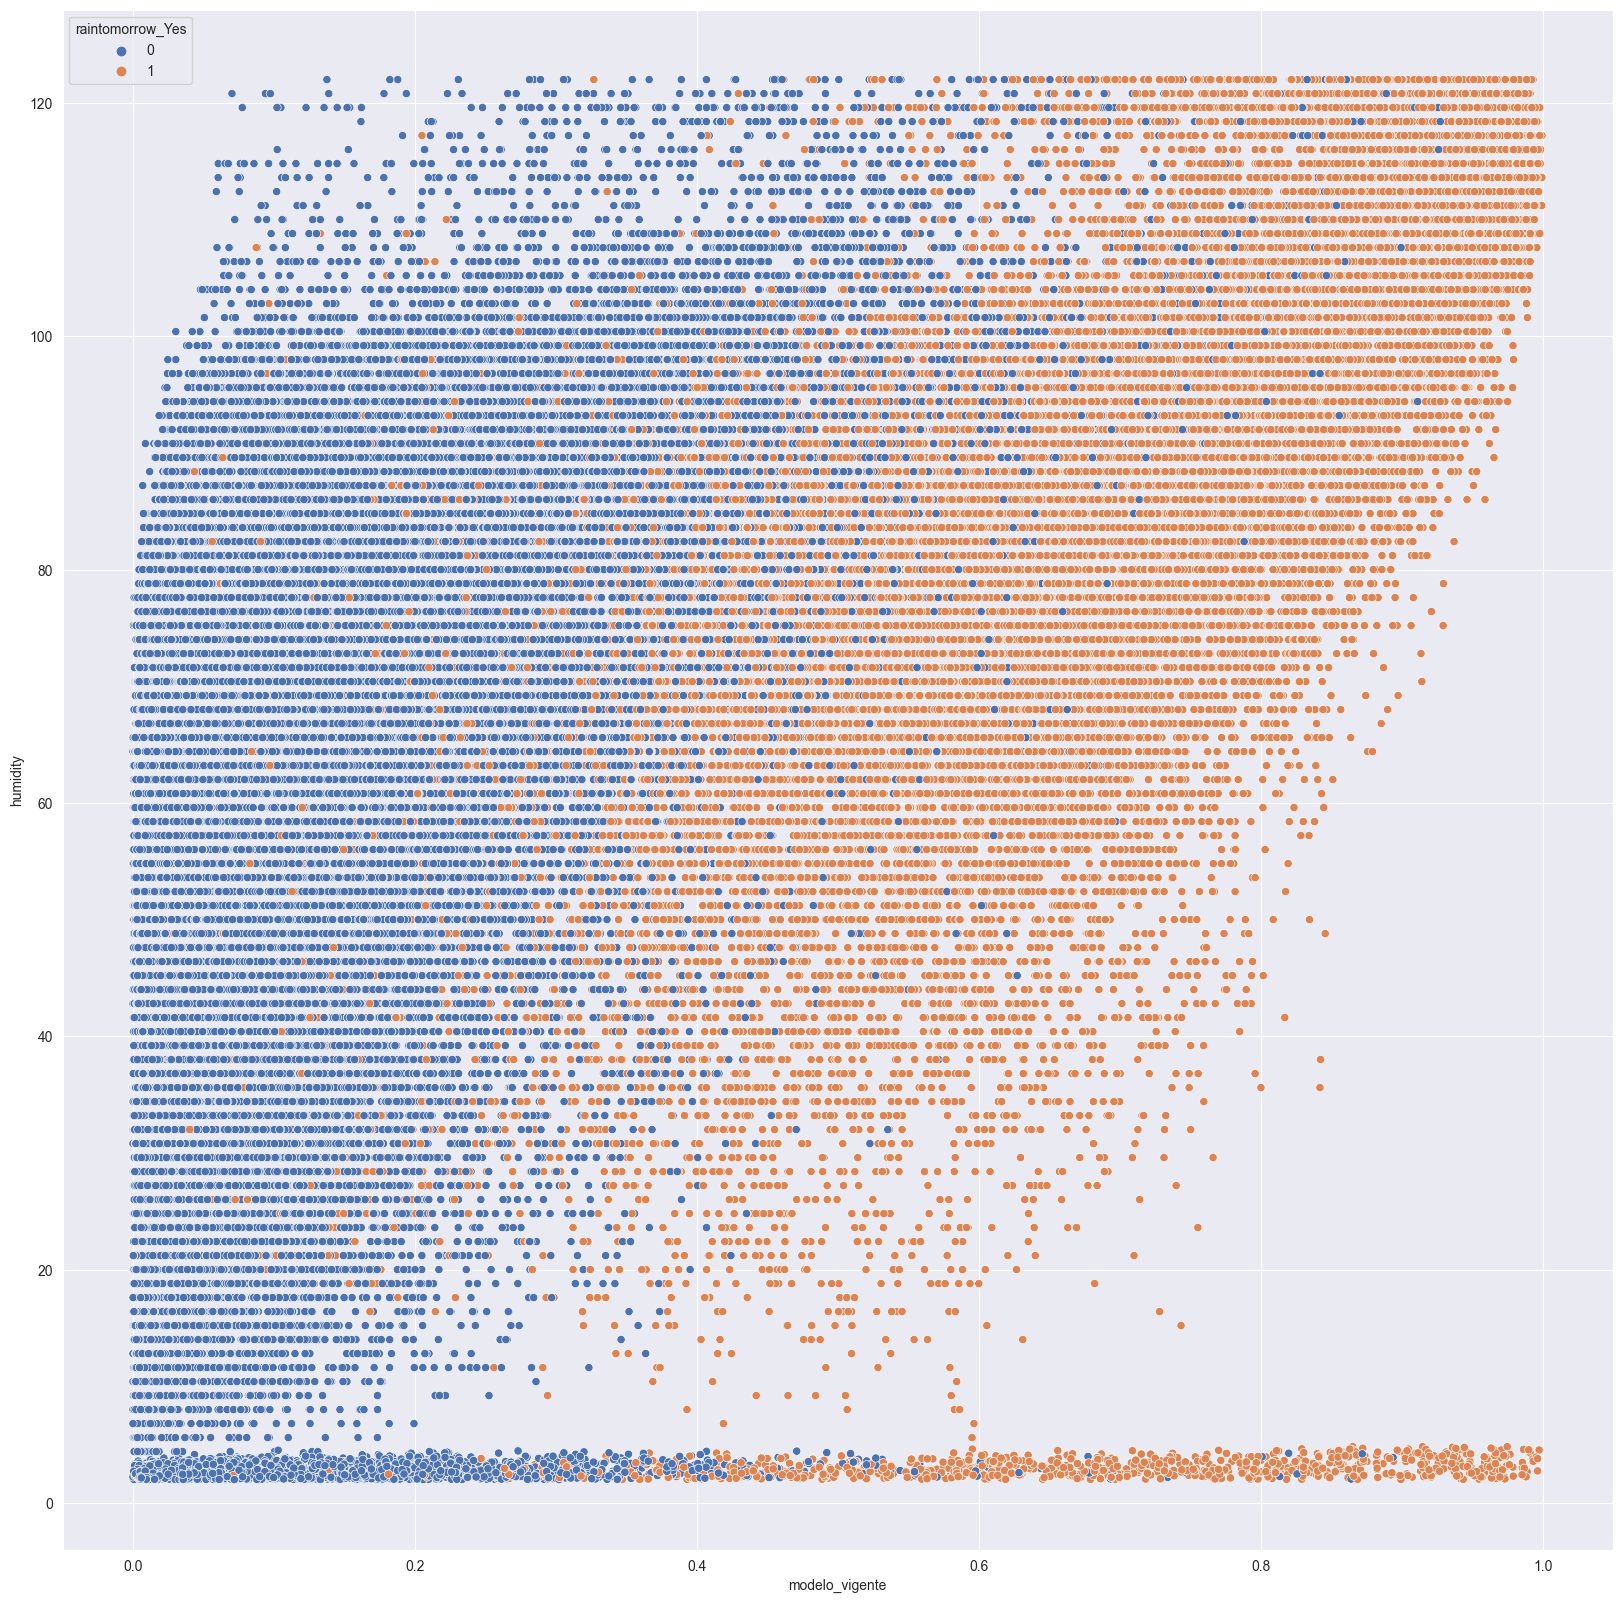

In [16]:
sns.scatterplot(x='modelo_vigente', y='humidity', hue = 'raintomorrow_Yes', data=chuva)

<Axes: xlabel='raintoday_Yes', ylabel='modelo_vigente'>

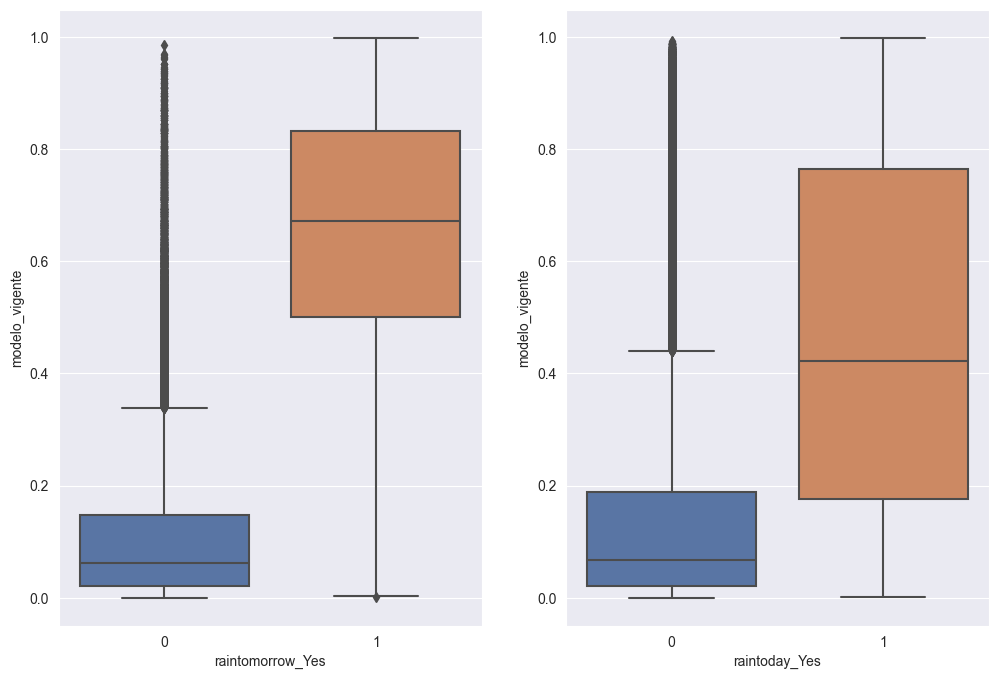

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12, 8))

sns.boxplot(x='raintomorrow_Yes', y='modelo_vigente', data=chuva, ax=ax[0])
sns.boxplot(x='raintoday_Yes', y='modelo_vigente', data=chuva, ax=ax[1])

<Axes: xlabel='amountOfRain', ylabel='humidity'>

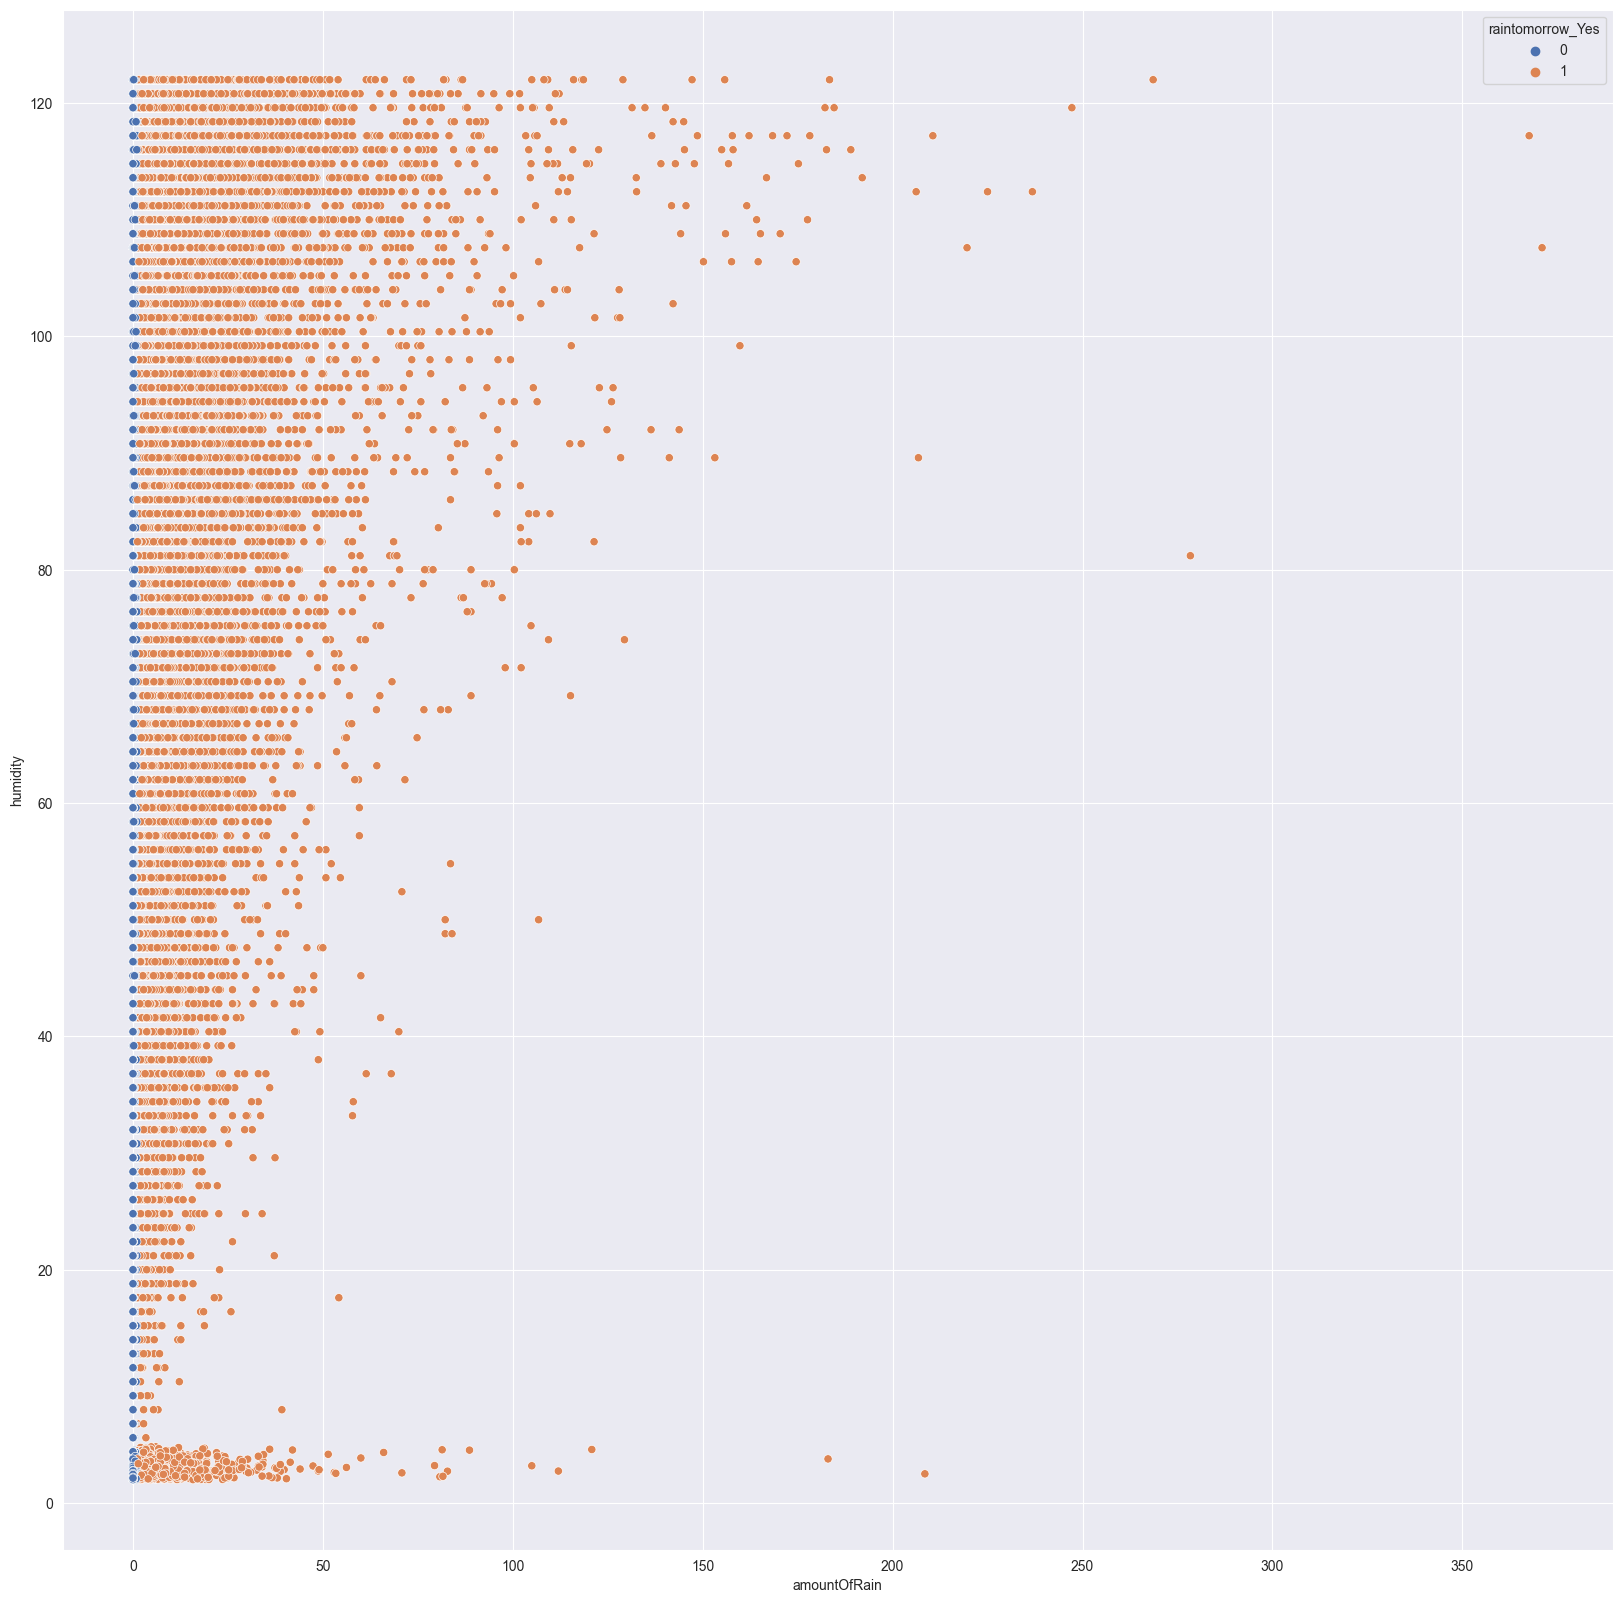

In [30]:
sns.scatterplot(x='amountOfRain', y='humidity', hue = 'raintomorrow_Yes', data=chuva)

## Modelo Preditivo

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
scaler = StandardScaler()

In [20]:
logistic = LogisticRegression()

In [21]:
X = chuva[['modelo_vigente', 'amountOfRain']]
y = chuva['raintomorrow_Yes']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

In [25]:
logistic.fit(X_std_train,y_train)

LogisticRegression()

In [26]:
logistic.predict(X_std_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [27]:
logistic.score(X_std_train, y_train)

0.9965100128347135

In [28]:
logistic.score(X_std_test, y_test)

0.9959210942719505

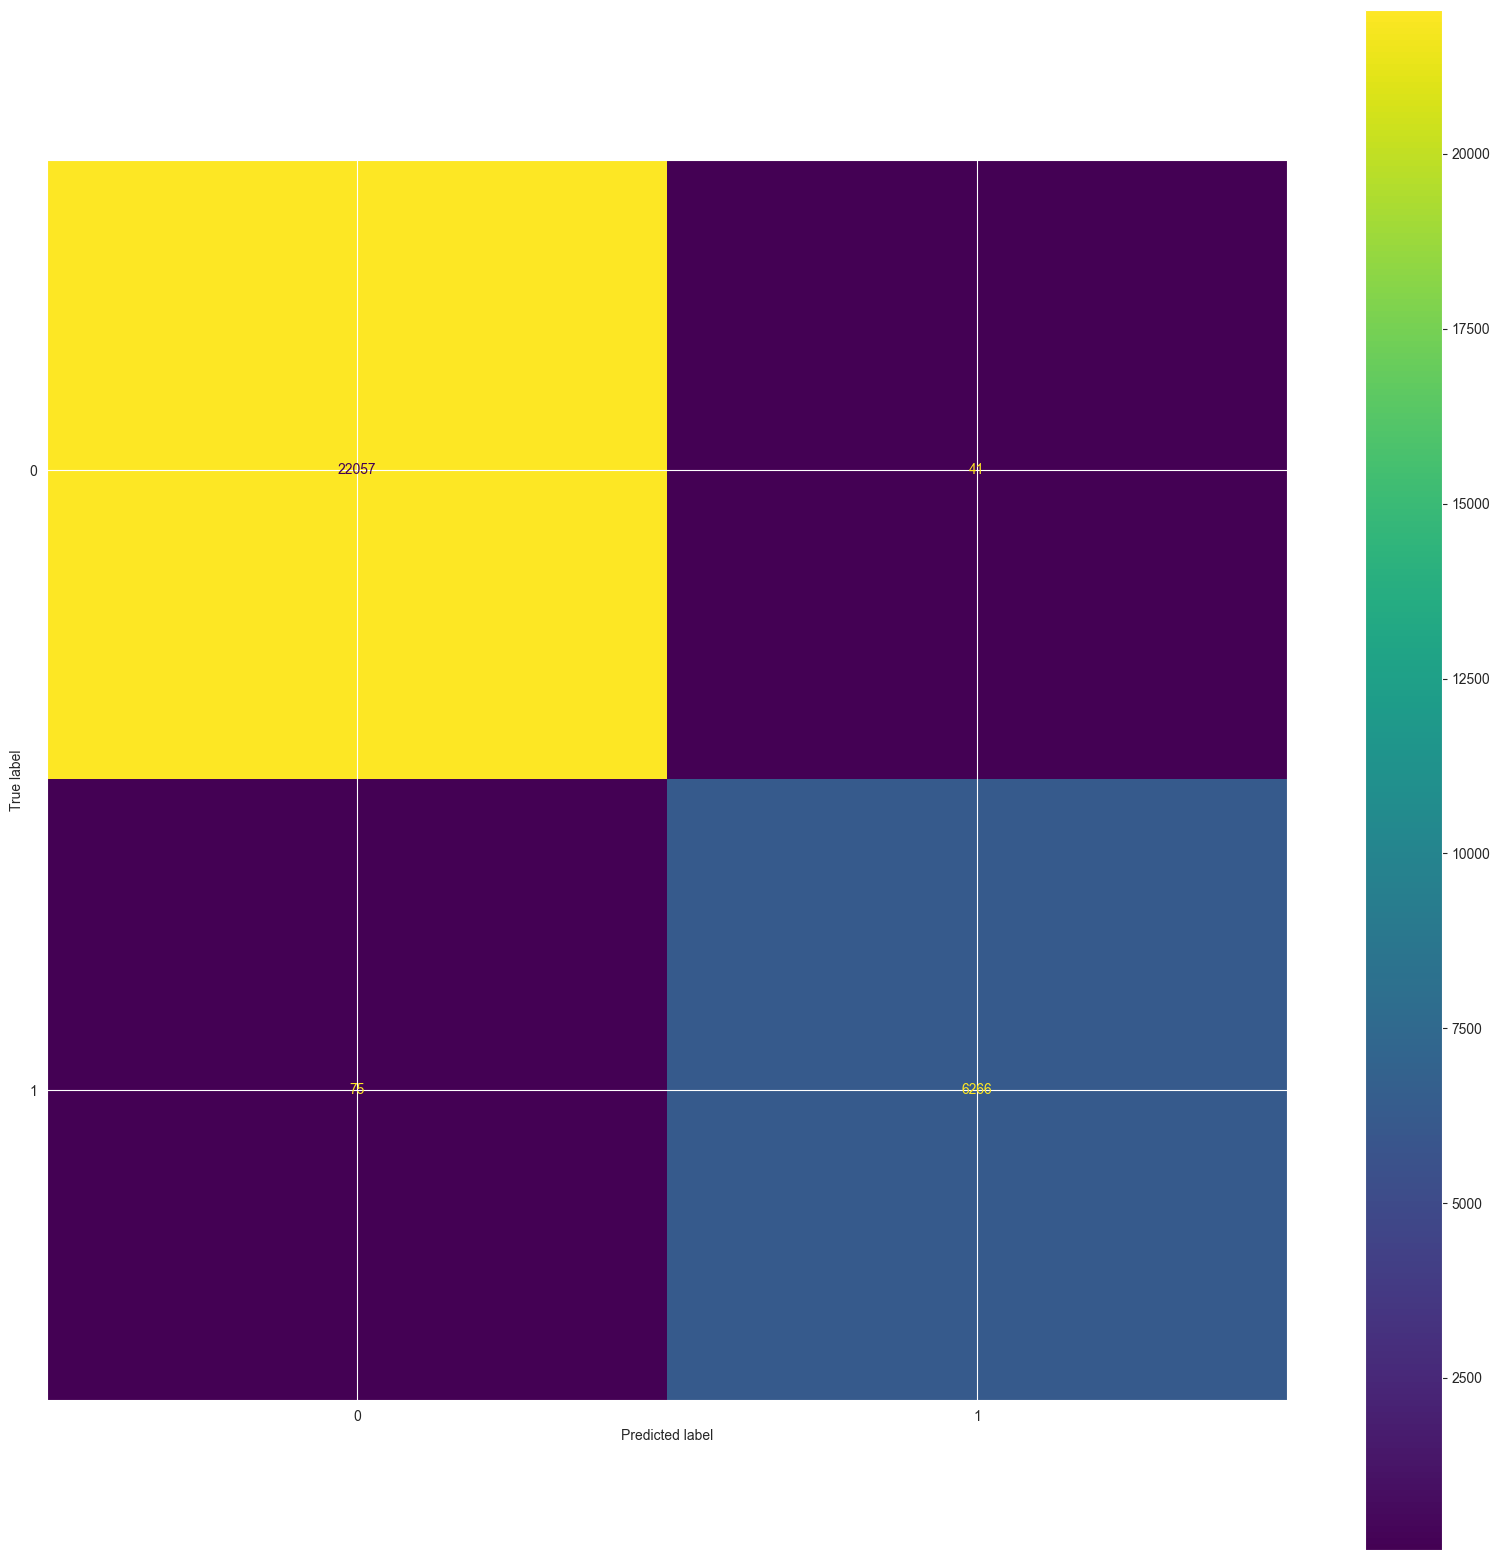

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, logistic.predict(X_std_test))).plot()